This a simple analysis for a churn model, a binary classification. The data was found at - http://www.superdatascience.com/wp-content/uploads/2017/03/Artificial_Neural_Networks.zip. 

The purpose was to evaluate the accuracy of logistic regression, random forest and Gradient boost for classification.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import ensemble
from sklearn import metrics




In [3]:
data = pd.read_csv("c:\DataScience\Bank_Churn\Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 14 columns and 10,000 rows. Exited is the target variable, 1 for churned, 0 for remaining a customer. Geography and Gender are both categorical variables. RowNumber, CustomerID and Surname aren't useful for this analysis.

In [13]:
pd.isnull(data).sum().sum()

0

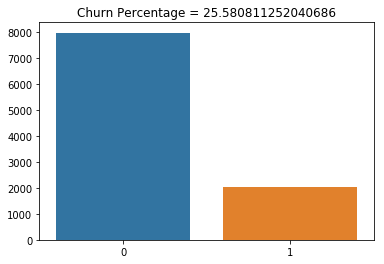

In [14]:
Churn_percentage = data['Exited'].value_counts()
Churn_bar = sns.barplot(Churn_percentage.index, Churn_percentage.values)
Churn_bar.set_title("Churn Percentage = "+str(Churn_percentage[1] / Churn_percentage[0] * 100));

In [15]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

A Churn rate of 25% seems quite high but it does mean that we shouldnt need to deal with imbalance.

To deal with the catagorical variables, dummy variables are created. While some models like random forests can handle catagorical variables. Logistical regression needs dummy variables/ one hot encoding.

In [16]:
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)

In [17]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700,0.250900,0.247700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.433553,0.431698
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Surname, RowNumber and CustomerID are dropped as they are not needed.
data.drop(['Surname','RowNumber', 'CustomerId'], axis = 1, inplace=True)

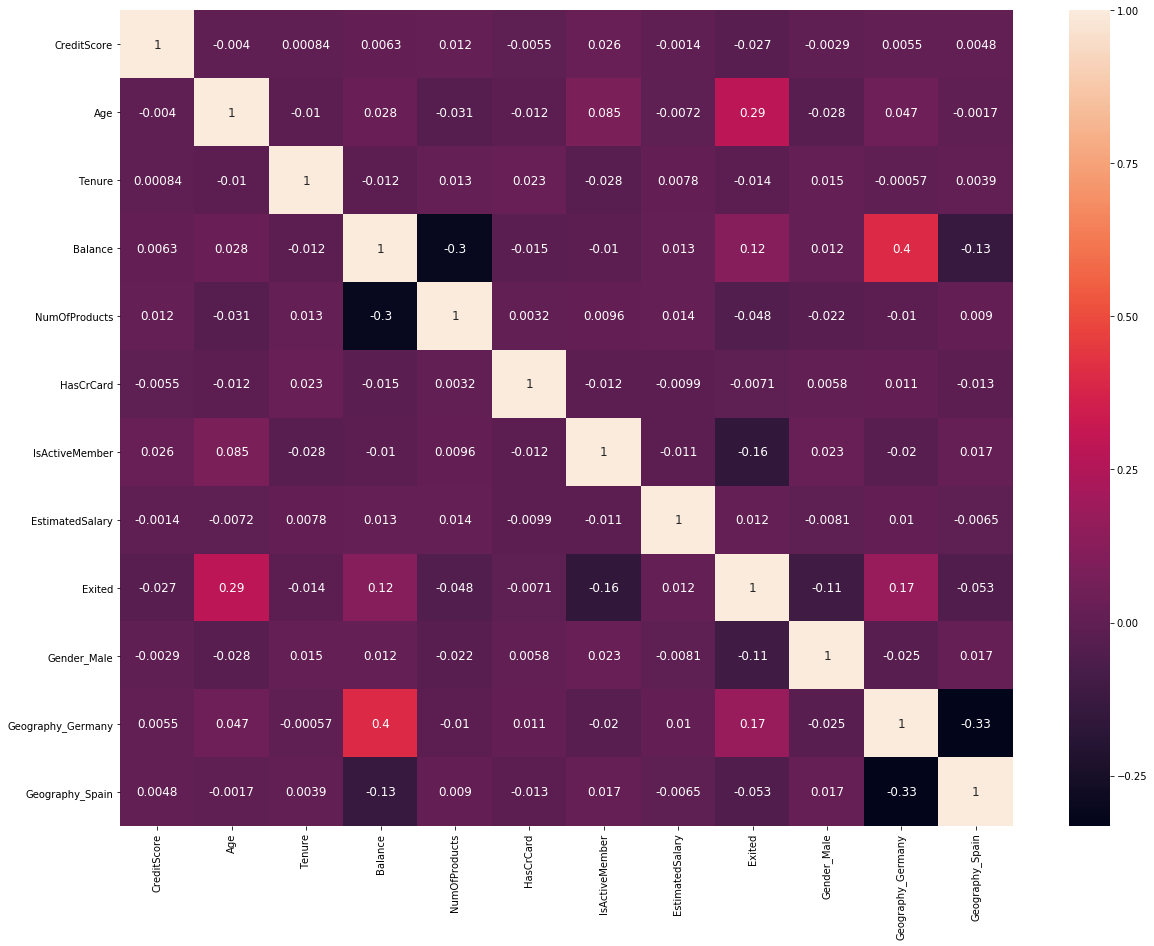

In [19]:
#Correlation of variables is checked to ensure there aren't issues of multicollinearity.
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [20]:
std = data.values 
min_max_scaler = preprocessing.MinMaxScaler()
std_scaled = min_max_scaler.fit_transform(std)
data_std=pd.DataFrame(std_scaled, columns=data.columns)

The variables are standardised, while not needed for random forests or gradient boosting it can improve model performance for logistic regression and rarely hurts the model. 

In [21]:
### Set up the training and test data set ###
train=data_std.sample(frac=0.7,random_state=1)
test=data_std.drop(train.index)

In [22]:
train['Exited'].value_counts()

0.0    5555
1.0    1445
Name: Exited, dtype: int64

In [23]:
test['Exited'].value_counts()

0.0    2408
1.0     592
Name: Exited, dtype: int64

In [24]:
train_y = train['Exited']

In [25]:
train.drop(['Exited'], axis = 1, inplace=True)

In [26]:
train_x = train

In [27]:
test_y = test['Exited']

test_x = test
test_x.drop(['Exited'], axis = 1, inplace=True)

To determine which model has the best performance, recall, percision and area under the curve will be considered for the test data.

In [28]:
#Running the Logistic regression and outputing classification report
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred_log = logisticRegr.predict(test_x)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred_log))

Accuracy of logistic regression classifier on test set: 0.81
             precision    recall  f1-score   support

        0.0       0.83      0.97      0.89      2408
        1.0       0.58      0.19      0.29       592

avg / total       0.78      0.81      0.77      3000



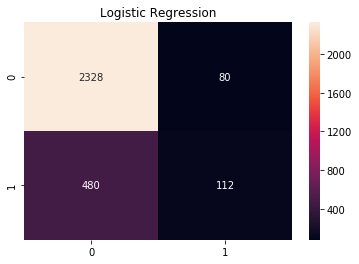

In [29]:
Logistic_conf_matrix = metrics.confusion_matrix(test_y, test_y_pred_log)
sns.heatmap(Logistic_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(test_y,test_y_pred_log,)
metrics.auc(fpr,tpr)
print('Area under curve for logistic regression on test set: {:.3f}'.format(metrics.auc(fpr,tpr)))

0.5779832989135315

In [35]:
#Running the Gradient Boosting Classifier and outputing classification report
GB = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=.5,
                                        max_depth=25)
GB.fit(X=train_x, y=train_y)
 
test_y_pred_GB = GB.predict(test_x)
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(GB.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred_GB))

Accuracy of Gradient Boosting classifier on test set: 0.86
             precision    recall  f1-score   support

        0.0       0.87      0.96      0.92      2408
        1.0       0.74      0.43      0.55       592

avg / total       0.85      0.86      0.84      3000



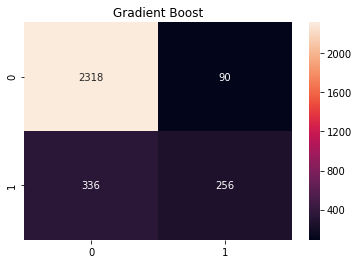

In [36]:
GB_conf_matrix = metrics.confusion_matrix(test_y,test_y_pred_GB)
sns.heatmap(GB_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boost'
plt.title(title);

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(test_y,test_y_pred_GB,)
metrics.auc(fpr,tpr)
print('Area under curve for gradient boosting on test set: {:.3f}'.format(metrics.auc(fpr,tpr)))

Area under curve for gradient boosting on test set: 0.698


In [39]:
#Running the Random Forest Classifier and outputing classification report
RFC = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=25, random_state=0, n_jobs=-1)
RFC.fit(X=train_x, y=train_y)
 
test_y_pred_RF = RFC.predict(test_x)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(RFC.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred_RF))

Accuracy of Random Forest classifier on test set: 0.86
             precision    recall  f1-score   support

        0.0       0.88      0.96      0.92      2408
        1.0       0.75      0.46      0.57       592

avg / total       0.85      0.86      0.85      3000



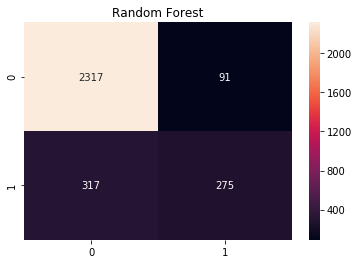

In [40]:
random_forest_conf_matrix = metrics.confusion_matrix(test_y,test_y_pred_RF)
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(test_y,test_y_pred_RF,)
metrics.auc(fpr,tpr)
print('Area under curve for random forests on test set: {:.3f}'.format(metrics.auc(fpr,tpr)))

Area under curve for random forests on test set: 0.713


Random Forest and Gradient boost perform similarly well, however random forests has a slightly higher area under curve score. Looking at the feature importantance for random forests shows that age is the most important variable, followed by estimated salary, credit score and balance. 

[0.1480188  0.23569853 0.08713278 0.14478694 0.11761765 0.01971653
 0.03868289 0.1497667  0.01984094 0.0239009  0.01483735]


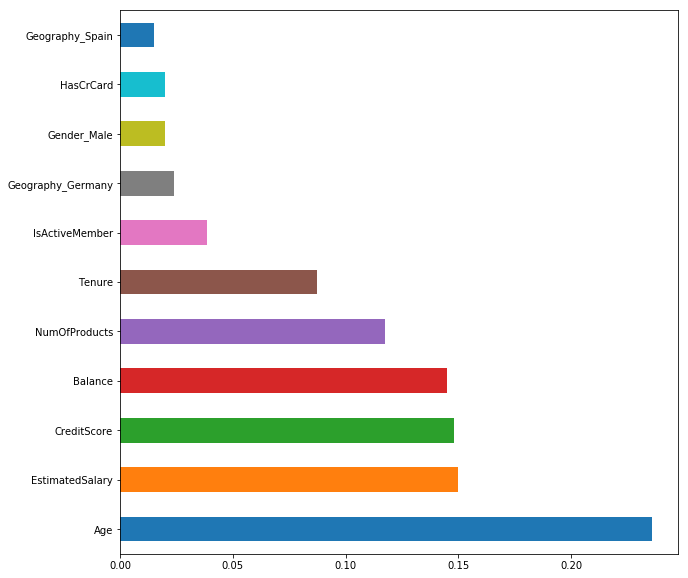

In [60]:
feature_importance = RFC.feature_importances_
print (RFC.feature_importances_);
feat_importances = pd.Series(RFC.feature_importances_, index=train_x.columns);
feat_importances = feat_importances.nlargest(20);
feat_importances.plot(kind='barh' , figsize=(10,10)); 